In [95]:
from packaging import version
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('science')

import tensorboard as tb

# Tensorboard evaluation

In [96]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.9.1


In [97]:
# tensorboard dev upload --logdir C:\Users\danie\OneDrive\Desktop\Bachelorarbeit\main\monitoring\logs\fit
experiment_id = "fQ7aGvgrT6ymaWQgYUlo1g"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df.head()

,run,tag,step,value
0,cnn2_noise_spectrum_01\train,epoch_loss,0,1.001332
1,cnn2_noise_spectrum_01\train,epoch_loss,1,0.997466
2,cnn2_noise_spectrum_01\train,epoch_loss,2,0.981823
3,cnn2_noise_spectrum_01\train,epoch_loss,3,0.919296
4,cnn2_noise_spectrum_01\train,epoch_loss,4,0.753504


In [165]:
runs = df["run"].unique()
metrics = df["tag"].unique()
print(runs)
print(metrics)

['cnn2_noise_spectrum_01\\train' 'cnn2_noise_spectrum_01\\validation'
 'cnn2_spectrum\\train' 'cnn2_spectrum\\validation'
 'cnn_noise_spectrum_01\\train' 'cnn_noise_spectrum_01\\validation'
 'cnn_noise_spectrum_03\\train' 'cnn_noise_spectrum_03\\validation'
 'cnn_noise_spectrum_05\\train' 'cnn_noise_spectrum_05\\validation'
 'cnn_spectrum\\train' 'cnn_spectrum\\validation'
 'mlp_noise01_kernelreg_L1L20.00001\\train'
 'mlp_noise01_kernelreg_L1L20.00001\\validation'
 'mlp_noise01_kernelreg_L1L20.0001\\train'
 'mlp_noise01_kernelreg_L1L20.0001\\validation'
 'mlp_noise01_kernelreg_L1L20.001\\train'
 'mlp_noise01_kernelreg_L1L20.001\\validation'
 'mlp_noise01_kernelreg_L1L20.01\\train'
 'mlp_noise01_kernelreg_L1L20.01\\validation'
 'mlp_noise01_kernelreg_L1L20.1\\train'
 'mlp_noise01_kernelreg_L1L20.1\\validation'
 'mlp_noise01_kernelreg_L1L210.0\\train'
 'mlp_noise01_kernelreg_L1L210.0\\validation'
 'mlp_noise_spectrum_01\\train' 'mlp_noise_spectrum_01\\validation'
 'mlp_noise_spectrum_03\

In [99]:
colors = sns.color_palette("Paired")
colors

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

[Text(0.5, 1.0, 'Epoch Loss'), Text(0.5, 0, 'Epochs'), (0.0, 0.4)]

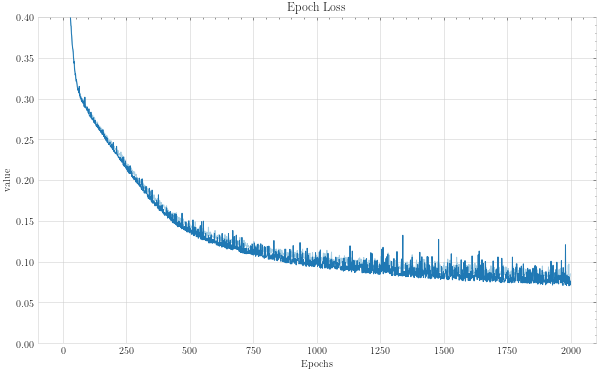

In [100]:
train = df[df.run.str.endswith("cnn_spectrum\\train")&(df.tag == "epoch_loss")]
validation = df[df.run.str.endswith("cnn_spectrum\\validation")&(df.tag == "epoch_loss")]
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=train, x="step", y="value",color=colors[0])
sns.lineplot(data=validation, x="step", y="value",color=colors[1])
ax.set(title = "Epoch Loss",xlabel = "Epochs",ylim=(0, 0.4))

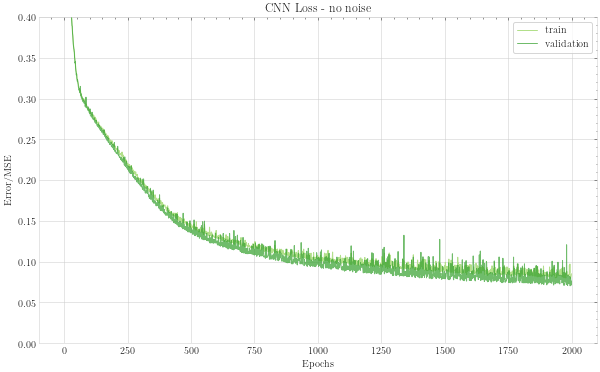

In [101]:
data = df[df.tag == "epoch_loss"]
data = (data.pivot(index = "run",columns= "step",values="value")).T
title = 'CNN Loss - no noise'
file = 'cnn_spectrum'
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data, x="step", y= f'{file}\\train',color=colors[2])
sns.lineplot(data=data, x="step", y= f'{file}\\validation',color=colors[3],alpha = 0.7)
ax.set(title=f"{title}", xlabel="Epochs",ylabel = "Error/MSE", ylim=(0, 0.4))
ax.legend(["train","validation"],frameon=True)
plt.savefig(f'images/{title}.png',dpi = 300)

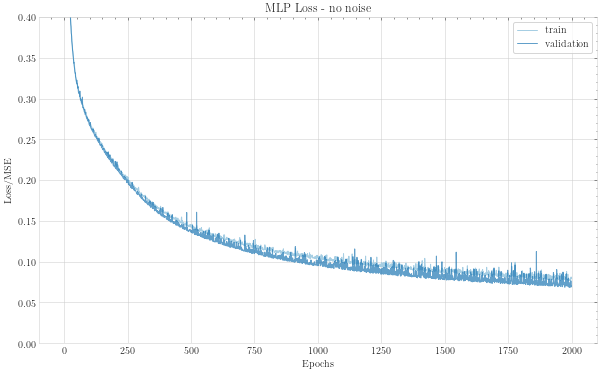

In [102]:
title = 'MLP Loss - no noise'
file = 'mlp_spectrum'
n = 0
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data, x="step", y= f'{file}\\train',color=colors[int(2*n)])
sns.lineplot(data=data, x="step", y= f'{file}\\validation',color=colors[int(2*n+1)],alpha = 0.7)
ax.set(title=f"{title}", xlabel="Epochs",ylabel = "Loss/MSE", ylim=(0, 0.4))
ax.legend(["train","validation"],frameon = True)
plt.savefig(f'images/{title}.png',dpi = 300)

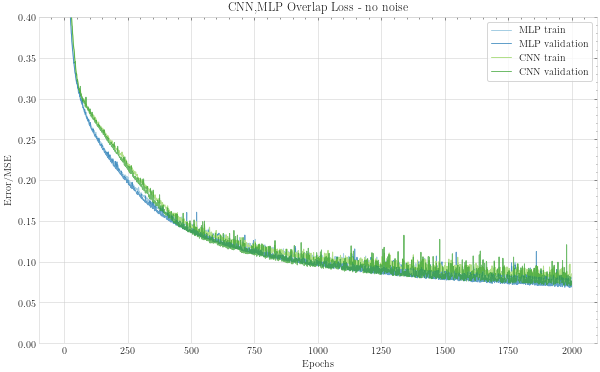

In [103]:
title = 'CNN,MLP Overlap Loss - no noise'
files = ['mlp_spectrum','cnn_spectrum']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y= f'{file}\\train',color=colors[int(2*n)])
    sns.lineplot(data=data, x="step", y= f'{file}\\validation',color=colors[int(2*n+1)],alpha = 0.7)

ax.set(title=f"{title}", xlabel="Epochs",ylabel = "Error/MSE", ylim=(0, 0.4))
ax.legend(["MLP train","MLP validation","CNN train","CNN validation"],frameon=True)
plt.savefig(f'images/{title}.png',dpi = 300)

In [104]:
title = 'MLP Loss - no noise,1%'
files = ['mlp1_noise','mlp1_noise_01']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y= f'{file}\\train',color=colors[int(2*n)])
    sns.lineplot(data=data, x="step", y= f'{file}\\validation',color=colors[int(2*n+1)],alpha = 0.7)

ax.set(title=f"{title}", xlabel="Epochs",ylabel = "Error/MSE", ylim=(0, 0.4))
ax.legend(["MLP train - no noise ","MLP validation - no noise","MLP train - 1% ","MLP validation - 1%"],frameon=True)
plt.savefig(f'images/{title}.png',dpi = 300)

ValueError: Could not interpret value `mlp1_noise\train` for parameter `y`

<Figure size 720x432 with 0 Axes>

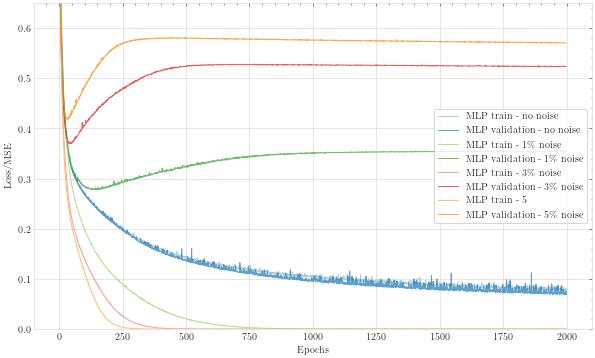

In [161]:
title = 'mlpbaseloss'
files = ['mlp_spectrum', 'mlp_noise_spectrum_01','mlp_noise_spectrum_03','mlp_noise_spectrum_05']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(xlabel="Epochs", ylabel="Loss/MSE", ylim=(0, 0.65))
ax.legend(["MLP train - no noise ", "MLP validation - no noise", "MLP train - 1\% noise ", "MLP validation - 1\% noise", "MLP train - 3\% noise ", "MLP validation - 3\% noise", "MLP train - 5\ % noise ", "MLP validation - 5\% noise"],frameon = True)
plt.savefig(f'images/{title}.png', dpi=300)

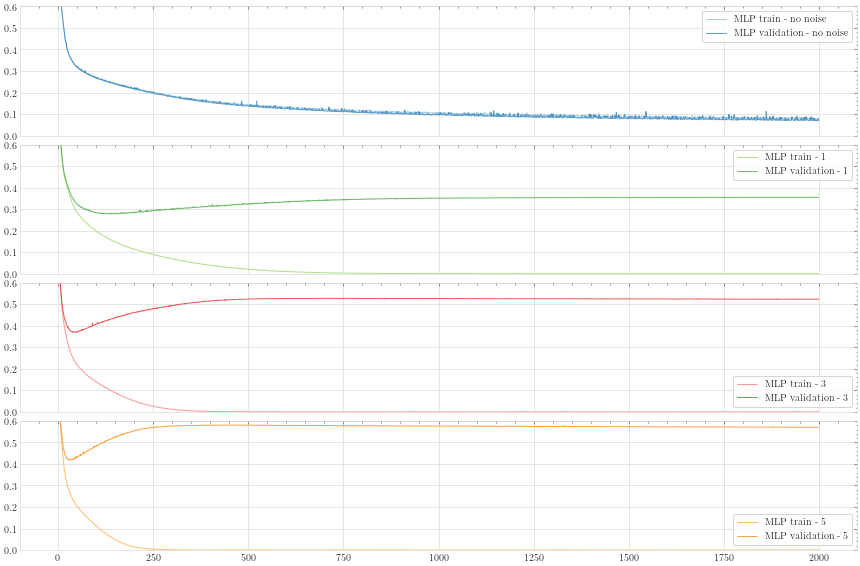

In [106]:
title = 'MLP Loss - no noise,1%,3%,5%'
files = ['mlp_spectrum', 'mlp_noise_spectrum_01','mlp_noise_spectrum_03','mlp_noise_spectrum_05']
legends = ["MLP train - no noise ", "MLP validation - no noise", "MLP train - 1% ", "MLP validation - 1%", "MLP train - 3% ", "MLP validation - 3%", "MLP train - 5% ", "MLP validation - 5%"]
fig,ax = plt.subplots(4,1,figsize=(15, 10),sharex=True,sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.07)
for n, file in enumerate(files):
    ax[n].plot(data[f'{file}\\train'], color=colors[int(2 * n)])
    ax[n].plot(data[f'{file}\\validation'], color=colors[int(2 * n + 1)], alpha=0.7)
    ax[n].set_ylim(0,0.6)
    ax[n].legend([legends[int(2*n)],legends[int(2*n+1)]],frameon=True)
#ax.set(title=f"{title}", xlabel="Epochs", ylabel="Error/MSE", ylim=(0, 0.65))
#ax.legend(["MLP train - no noise ", "MLP validation - no noise", "MLP train - 1% ", "MLP validation - 1%", "MLP train - 3% ", "MLP validation - 3%", "MLP train - 3% ", "MLP validation - 3%"])
#plt.savefig(f'images/{title}.png', dpi=300)

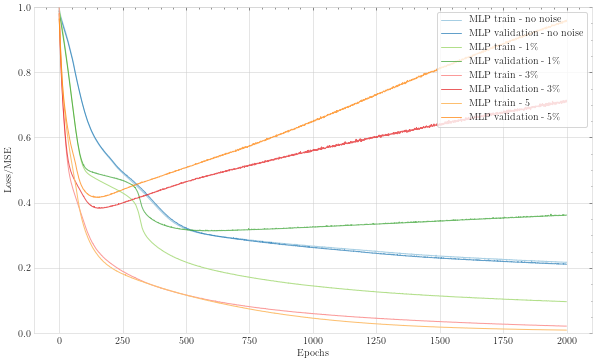

In [111]:
title = 'mlpsmallloss_alt'
files = ['mlp_small_spectrum', "mlp_small_noise_spectrum_01",'mlp_small_noise_spectrum_03','mlp_small_noise_spectrum_05']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(xlabel="Epochs", ylabel="Loss/MSE", ylim=(0, 1))
ax.legend(["MLP train - no noise ", "MLP validation - no noise", "MLP train - 1\% ", "MLP validation - 1\%", "MLP train - 3\% ", "MLP validation - 3\%", "MLP train - 5\ % ", "MLP validation - 5\%"],frameon = True,loc='upper right')
plt.savefig(f'images/{title}.png', dpi=300)

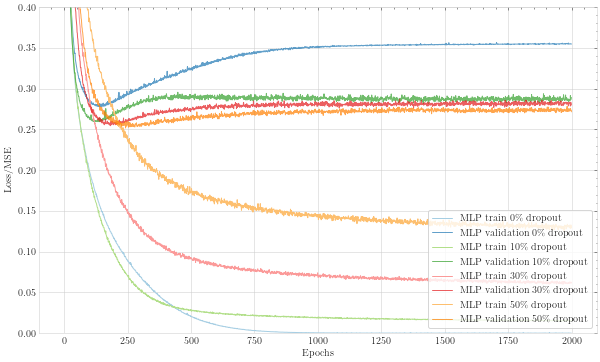

In [139]:
title = 'mlpdroputs'
files = ['mlp_noise_spectrum_01', 'mlp_s1_dropout_10', 'mlp_s1_dropout_30', 'mlp_s1_dropout_50']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(xlabel="Epochs", ylabel="Loss/MSE", ylim=(0, 0.4))
ax.legend(
    ["MLP train 0\% dropout", "MLP validation 0\% dropout", "MLP train 10\% dropout", "MLP validation 10\% dropout", "MLP train 30\% dropout", "MLP validation 30\% dropout", "MLP train 50\% dropout", "MLP validation 50\% dropout",],frameon=True,loc='lower right')
plt.savefig(f'images/{title}.png', dpi=300)

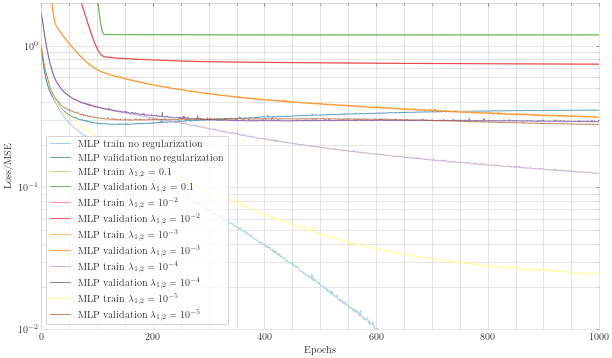

In [145]:
title = 'mlpregularlosslog'
files = ['mlp_noise_spectrum_01', 'mlp_noise01_kernelreg_L1L20.1', 'mlp_noise01_kernelreg_L1L20.01', 'mlp_noise01_kernelreg_L1L20.001','mlp_noise01_kernelreg_L1L20.0001','mlp_noise01_kernelreg_L1L20.00001']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(xlabel="Epochs", ylabel="Loss/MSE",yscale='log', ylim=(1e-2, 2),xlim =(0,1000))
plt.grid(which="minor")
ax.legend(
    ["MLP train no regularization", "MLP validation no regularization", "MLP train $\lambda_{1,2}$ = 0.1", "MLP validation $\lambda_{1,2}$ = 0.1", "MLP train $\lambda_{1,2} = 10^{-2}$", "MLP validation $\lambda_{1,2} = 10^{-2}$", "MLP train $\lambda_{1,2} = 10^{-3}$", "MLP validation $\lambda_{1,2} = 10^{-3}$","MLP train $\lambda_{1,2} = 10^{-4}$", "MLP validation $\lambda_{1,2} = 10^{-4}$","MLP train $\lambda_{1,2} = 10^{-5}$", "MLP validation $\lambda_{1,2} = 10^{-5}$"],frameon=True)
plt.savefig(f'images/{title}.png', dpi=300)

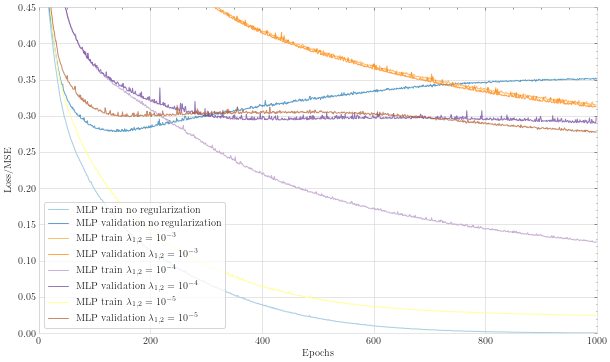

In [149]:
title = 'mlpregularlosszoom'
files = ['mlp_noise_spectrum_01', 'mlp_noise01_kernelreg_L1L20.001','mlp_noise01_kernelreg_L1L20.0001','mlp_noise01_kernelreg_L1L20.00001']
n = 0
colors_regular_zoom = [colors[x] for x in [0,1,6,7,8,9,10,11]]
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors_regular_zoom[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors_regular_zoom[int(2 * n + 1)], alpha=0.7)

ax.set(xlabel="Epochs", ylabel="Loss/MSE", ylim=(0,0.45 ),xlim =(0,1000))
ax.legend(
    ["MLP train no regularization", "MLP validation no regularization", "MLP train $\lambda_{1,2} = 10^{-3}$", "MLP validation $\lambda_{1,2} = 10^{-3}$","MLP train $\lambda_{1,2} = 10^{-4}$", "MLP validation $\lambda_{1,2} = 10^{-4}$","MLP train $\lambda_{1,2} = 10^{-5}$", "MLP validation $\lambda_{1,2} = 10^{-5}$"],frameon=True,loc='lower left')
plt.savefig(f'images/{title}.png', dpi=300)

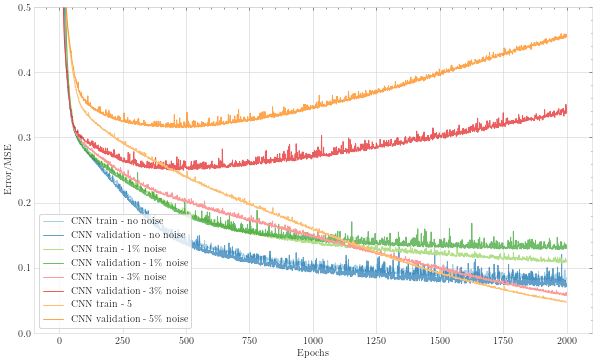

In [162]:
title = 'CNNbaseloss'
files = ['cnn_spectrum', 'cnn_noise_spectrum_01', 'cnn_noise_spectrum_03', 'cnn_noise_spectrum_05']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set( xlabel="Epochs", ylabel="Error/MSE", ylim=(0, 0.5))
ax.legend(["CNN train - no noise ", "CNN validation - no noise", "CNN train - 1\% noise ", "CNN validation - 1\% noise", "CNN train - 3\% noise ", "CNN validation - 3\% noise", "CNN train - 5\ % noise ", "CNN validation - 5\% noise"],frameon=True)
plt.savefig(f'images/{title}.png', dpi=300)

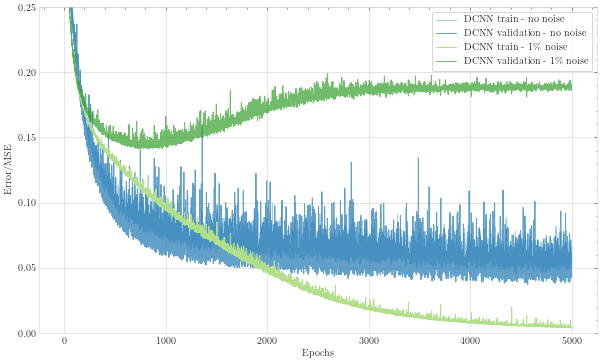

In [164]:
title = 'CNNdeeploss'
files = ['cnn2_spectrum', 'cnn2_noise_spectrum_01']
n = 0
plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set( xlabel="Epochs", ylabel="Error/MSE", ylim=(0, 0.25))
ax.legend(["DCNN train - no noise ", "DCNN validation - no noise", "DCNN train - 1\% noise ", "DCNN validation - 1\% noise"],frameon=True)
plt.savefig(f'images/{title}.png', dpi=300)

In [ ]:
title = 'MLP CNN Loss - no,1% noise,dropout10'
files = [ 'mlp1_no_noise', 'mlp1_noise_01','cnn1_noise_01', 'mlp_s1_dropout_10']

plt.figure(figsize=(10, 6))
for n, file in enumerate(files):
    ax = sns.lineplot(data=data, x="step", y=f'{file}\\train', color=colors[int(2 * n)])
    sns.lineplot(data=data, x="step", y=f'{file}\\validation', color=colors[int(2 * n + 1)], alpha=0.7)

ax.set(title=f"{title}", xlabel="Epochs", ylabel="Error/MSE", ylim=(0, 0.4))
ax.legend([ "MLP train - 0% noise", "MLP validation - 0% noise","MLP train - 1% noise", "MLP validation - 1% noise", "CNN train - 1% noise ", "CNN validation - 1%noise","MLP train - 1% noise 10% do", "MLP validation - 1% noise 10% do"],loc = "center right",frameon=True)
plt.savefig(f'images/{title}.png', dpi=300)